# Analysis

In [2]:
import time
import tqdm
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import re
import lemmy # For lemmatization
import nltk
from nltk.stem import SnowballStemmer
import itertools

from sklearn.feature_extraction.text import CountVectorizer
# Get stopwords list
nltk.download('stopwords')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfTransformer
from PIL import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oliver/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
stopwords = nltk.corpus.stopwords.words('danish')
stemmer = SnowballStemmer("danish")

## Load datasets

In [4]:
ft_sygeplej2x = pd.read_csv('ft_sygeplej2x.csv')
dr_sygeplej2x = pd.read_csv('dr_sygeplej2x.csv')
tv2_sygeplej2x = pd.read_csv('tv2_sygeplej2x.csv')

ft_2 = ft_sygeplej2x.copy() 
dr_2 = dr_sygeplej2x.copy() 
tv2_2 = tv2_sygeplej2x.copy()

# Preprocessing

## Remove non-alphanumerical characters

In [5]:
for df in [ft_2, dr_2, tv2_2]:
    df['content'] = df['content'].str.replace(r'\W', ' ')\
                                 .str.replace('  ', ' ')

/var/folders/g1/m2905s6d6093hshyj_v9xm380000gn/T/ipykernel_793/1145022020.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'] = df['content'].str.replace(r'\W', ' ')\


## Tokenization

In [4]:
# Download tokenizer
nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/oliver/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
dr_2['tokenized'] = df.apply(lambda row: nltk.tokenize.word_tokenize(row['content']), axis=1)

In [85]:
dr_2['around_sygeplej'] =df.apply(lambda row: re.select((\w+ ){0,5}FINDTHISWORD( \w+){0,5}), axis=1)

SyntaxError: unexpected character after line continuation character (776068930.py, line 1)

In [121]:
dr_2['stems']

0      antal dansk sygeplejersker, fået autorisation ...
1      trod fyringsrund sygehus båd 2010 2011 nedlæg ...
2      ikk nog undskyld ell beklage... formand region...
3      dansk sygeplejeråd, repræsent land omkring 70....
4      slut sygeplejerudtryk gebrokkent dansk nordjys...
                             ...                        
523    ikk kun sygeplejersker, flygt region sjælland ...
524    - patient lig gang dør, fordi ikk bliv tilset,...
525    høj løn bedr arbejdstider. det, fik sygeplejer...
526    melding sundhedsmyndighed vær helt klar - rigt...
527    ønsk se børn nog mere, oprind fik mal seld kro...
Name: stems, Length: 528, dtype: object

In [129]:
dr_2['content']

0      antallet af danske sygeplejersker, der har fåe...
1      trods fyringsrunder på sygehusene i både 2010 ...
2      der er ikke noget at undskylde eller beklage.....
3      dansk sygeplejeråd, der repræsenterer landets ...
4      det er slut med sygeplejerudtryk på gebrokkent...
                             ...                        
523    det er ikke kun sygeplejersker, der flygter fr...
524    - patienter ligger på gangene og dør, fordi de...
525    højere løn og bedre arbejdstider. det var det,...
526    meldingen fra sundhedsmyndighederne har været ...
527    det var et ønske om at se sine børn noget mere...
Name: content, Length: 528, dtype: object

In [6]:
def extract_surround_words(text, keyword, n):
    '''
    text : input text
    keyword : the search keyword we are looking
    n : number of words around the keyword
    '''
    #extracting all the words from text
    words = words = re.findall(r'\w+', text)
    
    #iterate through all the words
    for index, word in enumerate(words):

        #check if search keyword matches
        if word == keyword:
            #fetch left side words
            left_side_words = words[index-n : index]
            
            #fetch right side words
            right_side_words = words[index+1 : index + n + 1]
            
            print(left_side_words, right_side_words)


In [7]:
extract_surround_words(dr_2['stems'][5], "sygeplejersk", 15)

KeyError: 'stems'

In [200]:
def extract_surround_words2(text, keyword, n):
    '''
    text : input text
    keyword : the search keyword we are looking
    n : number of words around the keyword
    '''
    surround_words=[]
    #extracting all the words from text
    words = words = re.findall(r'\w+', text)
    
    #iterate through all the words
    for index, word in enumerate(words):

        #check if search keyword matches
        if word == keyword:
            #fetch left side words
            left_side_words = words[index-n : index]
            
            #fetch right side words
            right_side_words = words[index+1 : index + n + 1]
            
            surround_words.append(left_side_words)
            surround_words.append(right_side_words)
    return surround_words

In [201]:
extract_surround_words2(dr_2['stems'][5], "sygeplejersk", 15)

[[],
 ['bliv',
  'stor',
  'stil',
  'uddan',
  'ledighed',
  '85',
  'procent',
  'nyuddanned',
  'sygeplejersk',
  'uddan',
  'viborg',
  'holstebro',
  'arbejdsløse',
  'så',
  'går'],
 [],
 ['uddan',
  'viborg',
  'holstebro',
  'arbejdsløse',
  'så',
  'går',
  'tre',
  'halvt',
  'år',
  'su',
  'ogstudie',
  'så',
  'kom',
  'arbejdsmarked',
  'ikk'],
 ['ikk',
  'nog',
  'arbejd',
  'få',
  'anita',
  'staarup',
  'nyuddanned',
  'sygeplejersker',
  'all',
  'nyuddanned',
  'holstebro',
  'kom',
  'arbejdsløshed',
  'kun',
  'syv'],
 ['uddan',
  'viborg',
  'job',
  'senest',
  'halv',
  'års',
  'tid',
  '200',
  'sygeplejersk',
  'fyr',
  'ved',
  'hospitalsen',
  'vest',
  'sygehus',
  'viborg'],
 ['nyuddanned',
  'holstebro',
  'kom',
  'arbejdsløshed',
  'kun',
  'syv',
  'sygeplejersk',
  'uddan',
  'viborg',
  'job',
  'senest',
  'halv',
  'års',
  'tid',
  '200'],
 ['fyr',
  'ved',
  'hospitalsen',
  'vest',
  'sygehus',
  'viborg',
  'giv',
  'endnu',
  'ring',
  'chan

In [ ]:
def extract_surround_words2(text, keyword, n):
    '''
    text : input text
    keyword : the search keyword we are looking
    n : number of words around the keyword
    '''
    surround_words=[]
    #extracting all the words from text
    words = words = re.findall(r'\w+', text)
    
    #iterate through all the words
    for index, word in enumerate(words):

        #check if search keyword matches
        if word == keyword:
            #fetch left side words
            left_side_words = words[index-n : index]
            
            #fetch right side words
            right_side_words = words[index+1 : index + n + 1]
            
            surround_words.append(left_side_words)
            surround_words.append(right_side_words)
    return surround_words

In [220]:
def find_relevant(df, word, n):
    r=[]
    for row in df['stems']:
        temp=extract_surround_words2(row, word, n)
        temp_list=[]
        for i in temp:
            stems=' '.join(i)
            temp_list.append(stems)
            s=" ".join(temp_list)
        r.append(s)
    df['relevant']=r
    return df

In [221]:
relevant_df=find_relevant(dr_2, "sygeplejersk", 20)

In [222]:
relevant_df

,Unnamed: 0,titles,sub_header,h2,content,author,tag,date,link,source,tokenized,stems,relevant
0,0,danske sygeplejersker får job i norge,"krise, fyringer og ansættelsesstop får sygeple...",markant flere,"antallet af danske sygeplejersker, der har fåe...",ritzau/,Penge,2012-01-19 13:27:00+00:00,https://www.dr.dk/nyheder/penge/danske-sygeple...,DR,"[mens, nyuddannede, danske, sygeplejersker, ha...","antal dansk sygeplejersker, fået autorisation ...",tag norg arbejde sygeplejersk brænd fag helt ...
1,1,næsten ingen ledige sygeplejersker,trods fyringsrunder i både 2010 og 2011 er arb...,NaN,trods fyringsrunder på sygehusene i både 2010 ...,henny mortensen,Sjælland,2012-01-28 07:42:00+00:00,https://www.dr.dk/nyheder/regionale/sjaelland/...,DR,"[antallet, af, danske, sygeplejersker, der, ha...",trod fyringsrund sygehus båd 2010 2011 nedlæg ...,region sjælland senest tal vis 85 led arbejds...
2,5,regionsformand: jeg har ikke noget at undskylde,"steen bach nielsen forstår ikke, at sygeplejer...",NaN,der er ikke noget at undskylde eller beklage.....,jørgen hansen,Sjælland,2012-01-24 15:39:00+00:00,https://www.dr.dk/nyheder/regionale/sjaelland/...,DR,"[en, bevæbnet, mand, har, skudt, og, dræbt, sy...",ikk nog undskyld ell beklage... formand region...,truer anmeld steen bach niels ombudsmand krænk...
3,14,sygeplejersker vil skære i nattevagter,risiko for at natarbejde er kræftfremkaldende ...,færre nattevagter fast døgnrytme er vigtig,"dansk sygeplejeråd, der repræsenterer landets ...",ritzau,Indland,2012-02-21 10:48:00+00:00,https://www.dr.dk/nyheder/indland/sygeplejersk...,DR,"[hvert, år, dør, hundredvis, af, patienter, fo...","dansk sygeplejeråd, repræsent land omkring 70....",steenberg næstformand dansk sygeplejeråd forts...
4,15,udenlandske sygeplejersker er taget hjem,det er slut med sygeplejerudtryk på gebrokkent...,NaN,det er slut med sygeplejerudtryk på gebrokkent...,mikkel from nielsen,Nordjylland,2012-02-27 15:26:00+00:00,https://www.dr.dk/nyheder/regionale/nordjyllan...,DR,"[sygeplejersker, lærere, politifolk, og, unge,...",slut sygeplejerudtryk gebrokkent dansk nordjys...,tyskland sid bespar betydet led dansk sygeple...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,1495,læger og sygeplejersker siger stop: 'kan ikke ...,"ifølge ansatte på holbæk sygehus, så er forhol...",besøg fra arbejdstilsynet klare krav,"det er ikke kun sygeplejersker, der flygter fr...",trine warrer juul,Sjælland,2021-12-06 04:55:00+00:00,https://www.dr.dk/nyheder/regionale/sjaelland/...,DR,"[sundhedsstyrelsen, kom, torsdag, med, hård, k...","ikk kun sygeplejersker, flygt region sjælland ...",svær problem ell fordi uden kontrol så kan bri...
524,1496,detektor: talsperson erkender - har ikke tal p...,talsperson for opsigelser blandt sygeplejerske...,debatindlæg som dokumenation sundhedsøkonom: '...,"- patienter ligger på gangene og dør, fordi de...",august stenbroen,Detektor,2021-12-22 19:39:00+00:00,https://www.dr.dk/nyheder/detektor/detektor-ta...,DR,"[stop, det, offentlige, forbrug, og, sænk, ska...","- patient lig gang dør, fordi ikk bliv tilset,...",patient lig gang dør fordi ikk bliv tilset sag...
525,1497,flere sygeplejersker skifter til det private: ...,der skal gøres noget ved løn og vilkår i det o...,fik hjertebanken sygeplejerskerne siger fra ’i...,"højere løn og bedre arbejdstider. det var det,...",allan nisgaard,Indland,2021-12-29 04:46:00+00:00,https://www.dr.dk/nyheder/indland/flere-sygepl...,DR,"[der, er, mange, forsinkelser, og, fejl, i, va...","høj løn bedr arbejdstider. det, fik sygeplejer...",selv camilla ros hansen fler sygeplejersker væ...
526,1498,nu skal sygeplejersker og læger fra hospitaler...,i både region midtjylland og region syddanmark...,frygter længere ventelister ansætter mange,meldingen fra sundhedsmyndighederne har været ...,emil eller,Indland,2021-12-15 04:50:00+00:00,https://www.dr.dk/nyheder/indland/nu-skal-syge...,DR,"[36, årige, kirsten, brosbøl, bliver, ny, milj...",melding sundhedsmyndighed vær helt k

In [5]:
r=[]
for row in dr_2['stems']:
    temp=extract_surround_words2(row, "sygeplejersk", 20)
    temp_list=[]
    for i in temp:
        stems=' '.join(i)
        temp_list.append(stems)
        s=" ".join(temp_list)
    r.append(s)
dr_2['relevant']=r

KeyError: 'stems'

In [ ]:
dr_2['relevant']=r

In [219]:
dr_2['relevant'][527]

'kobl hav nog fritid lyd hend forklaring mal seld krogh ikk alen hav 32 tim arbejdsuge kun 47 2 procent rand ansat fuldtid lav andel fuldtidsansat kombin generel mangel sygeplejersk noget grad pres sygehuset novemb 36 sygeplejerskestilling regionshospital rand ubesatte ikk alen hav 32 tim arbejdsuge kun 47 2 procent sygeplejersk rand ansat fuldtid lav andel fuldtidsansat kombin generel mangel noget grad pres sygehuset novemb 36 sygeplejerskestilling regionshospital rand ubesatte vis årl opgør region midtjylland mærkbar stigning sidst år kun vaccinationsindsat brug all sundhedsfag hænder herund sygeplejersker overhoved kan få fat i hospitalsdirektør jona dal kun direktør lok samt deltidsansat fuldtid kun minimum find tim svar 26 årsværk ærgr over ikk lykked få fler tid hospitalsled ønsk få fler fuld strategi om all led stilling uans medarbejdergrup opslå fuldtidsstillinger mål er ott ti medarbejd region arbejd fuldtid alligevel fordeling deltidsansat ikk alvor ryk syv år strategi vær sp

In [169]:
def search(text,n):
    '''Searches for text, and retrieves n words either side of the text, which are retuned seperatly'''
    word = r"\W*([\w]+)"
    groups = re.search(r'{}\W*{}{}'.format(word*n,'sygeplejersker',word*n), text).group()
    return groups[:n],groups[n:]

In [167]:
def search(text:n):
    '''Searches for text, and retrieves n words either side of the text, which are retuned seperatly'''
    word = r"\W*([\w]+)"
    groups = re.search(r'((?:\w+\W+){,3})(sygeplejersker)\W+((?:\w+\W+){,3})', text)
    return groups[:n],groups[n:]

NameError: name 'n' is not defined

In [170]:
a=search(dr_2['stems'][0], 5)

In [171]:
a

('antal', ' dansk sygeplejersker, fået autorisation norge, næst tredobl')

In [160]:
s='The world is a small place, we should try to take care of it.'
m = re.search(r'((?:\w+\W+){,3})(sygeplejersker)\W+((?:\w+\W+){,3})', dr_2['content'][2])
if m:
    l = [ x.strip().split() for x in m.groups()]
left, right = l[0], l[2]
print(left, right)

['opfordrede"lokalt', 'ansatte'] ['til', 'at', 'samarbejde', '"']


In [150]:
dr_relevant=[]
for row in dr_2['stems']:
    row_list=[]
    m = re.findall(r'((?:\w+\W+){,3})(sygeplejersker)\W+((?:\w+\W+){,3})', dr_2['stems'][row])
    if m:
        l = [ x.strip().split() for x in m.groups()]
    left, right = l[0], l[2]
    dr_relevant
    

KeyError: 'antal dansk sygeplejersker, fået autorisation norge, næst tredobl år. krise, fyring ansættelsesstop får sygeplejersk tag norg arbejde. - sygeplejersk brænd fag, helt naturligt, søg derhen, arbejde. desvær situation danmark, arbejdsgiv valg ikk ansæt all kompetent sygeplejersk er, meg bekymrende, gret christensen, formand dansk sygeplejeråd. senest tal viser, antal dansk sygeplejersker, fået autorisation norge, steg 154 januar 2010 434 januar 2011. - helt afgørende, herhjem får gjort alt, mul for, tilbyd sygeplejersk job kommun regionerne, gret christensen.'

In [133]:
relevant_list=[]
for row in tqdm.tqdm(dr_2['stems'][0:10]):
    relevant_list.append(search(row, 5))
    
    

100%|██████████| 10/10 [00:00<00:00, 103.15it/s]


In [128]:
relevant_list

[('antal', 'let af danske sygeplejersker, der har fået autorisation i'),
 (' er d',
  'er meget få arbejdsløse sygeplejersker i region sjælland. det seneste'),
 (' fals',
  'ter "stærkt opfordrede"lokalt ansatte sygeplejersker til at samarbejde "i stedet'),
 (' repr',
  'æsenterer landets omkring 70.000 sygeplejersker, mener, at det skal være'),
 (' år s',
  'iden måtte sygehusene importere sygeplejersker fra tyskland. men siden har'),
 ('. 85 ',
  'procent af de nyuddannede sygeplejersker fra uddannelserne i viborg og'),
 ('nyudd', 'annede sygeplejersker har svært ved at finde'),
 (' er b',
  'levet sværere for nyuddannede sygeplejersker at finde et job - ledigheden'),
 (' i re',
  'gion hovedstaden, hvor specialuddannede sygeplejersker står klar til at rådgive'),
 (' regi',
  'on hovedstaden. her sidder specialudannede sygeplejersker klar ved telefonen for at')]

In [ ]:
 stemmed_tok = [porter_stemmer.stem(token) for token in tokens]

In [49]:
dr_2['stemmed'] = df.apply(lambda row: [stemmer.stem(['tokenized']) for word in ['tokenized']], axis=1)



AttributeError: 'list' object has no attribute 'lower'

In [8]:
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens=[stemmer.stem(word) for word in tokens]
    no_stop=[word for word in stemmed_tokens if not word in stopwords]
    stems=' '.join(no_stop)
    return stems


In [9]:
stemmed_list=[]
for i in dr_2['content']:
    stems=stem_sentences(i)
    stemmed_list.append(stems)

dr_2['stems']=stemmed_list

In [10]:
ft_2_stemmed_list=[]
for i in ft_2['content']:
    stems=stem_sentences(i)
    ft_2_stemmed_list.append(stems)

ft_2['stems']=ft_2_stemmed_list

In [11]:
tv2_2_stemmed_list=[]
for i in tv2_2['content']:
    stems=stem_sentences(i)
    tv2_2_stemmed_list.append(stems)

tv2_2['stems']=tv2_2_stemmed_list

In [49]:
def extract_surround_words2(text, keyword, n):
    '''
    text : input text
    keyword : the search keyword we are looking
    n : number of words around the keyword
    '''
    surround_words=[]
    #extracting all the words from text
    words = words = re.findall(r'\w+', text)
    
    #iterate through all the words
    for index, word in enumerate(words):

        #check if search keyword matches
        if word == keyword:
            #fetch left side words
            left_side_words = words[index-n : index]
            
            #fetch right side words
            right_side_words = words[index+1 : index + n + 1]
            
            surround_words.append(left_side_words)
            surround_words.append(right_side_words)
    return surround_words

In [50]:
def find_relevant(df, word, n):
    r=[]
    for row in df['stems']:
        temp=extract_surround_words2(row, word, n)
        temp_list=[]
        for i in temp:
            stems=' '.join(i)
            temp_list.append(stems)
            s=" ".join(temp_list)
        r.append(s)
    df['relevant']=r
    return df

In [116]:
find_relevant(dr_2, "sygeplejersk", 3)
find_relevant(tv2_2, "sygeplejersk", 3)
find_relevant(ft_2, "sygeplejersk", 3)

,Unnamed: 0,session,meetingnumber,date,location,group,content,path,source,stems,relevant
0,1,20111,102,2012-09-13,Folketingssalen,Folketinget,det næste punkt på dagsordenen er 3 3 behandli...,/ODAXML/Referat/samling/20111/20111_M102_helem...,FT,næst punk dagsorden 3 3 behandling lovforslag ...,fabriksarbejd rengøringsassistent metalarbejd ...
1,5,20111,48,2012-02-21,Folketingssalen,Folketinget,det sidste punkt på dagsordenen er 17 forespør...,/ODAXML/Referat/samling/20111/20111_M48_helemo...,FT,sidst punk dagsorden 17 forespørgsel nr f 14 f...,fler sosu ell gansk enkelt ikk sundhedsassiste...
2,6,20111,57,2012-03-14,Folketingssalen,Folketinget,det sidste punkt på dagsordenen er 2 besvarels...,/ODAXML/Referat/samling/20111/20111_M57_helemo...,FT,sidst punk dagsorden 2 besvar oversend spørgsm...,udlændingepolitik 23 årig australi ikk kan kon...
3,7,20111,58,2012-03-20,Folketingssalen,Folketinget,det næste punkt på dagsordenen er 20 1 behandl...,/ODAXML/Referat/samling/20111/20111_M58_helemo...,FT,næst punk dagsorden 20 1 behandling lovforslag...,danmark 23 årig australi ønsk kom regl 23 årig...
4,8,20111,62,2012-03-27,Folketingssalen,Folketinget,det sidste punkt på dagsordenen er 11 forhandl...,/ODAXML/Referat/samling/20111/20111_M62_helemo...,FT,sidst punk dagsorden 11 forhandling redegør nr...,pædagog folkeskolelær socialrådgiv altså hvord...
...,...,...,...,...,...,...,...,...,...,...,...
291,515,20211,84,2022-03-31,Folketingssalen,Folketinget,det næste punkt på dagsordenen er 8 forhandlin...,/ODAXML/Referat/samling/20211/20211_M84_helemo...,FT,næst punk dagsorden 8 forhandling redegør nr r...,hel debat tjenestemandsreform strejk virk sat ...
292,516,20211,84,2022-03-31,Folketingssalen,Folketinget,det sidste punkt på dagsordenen er 13 forespør...,/ODAXML/Referat/samling/20211/20211_M84_helemo...,FT,sidst punk dagsorden 13 forespørgsel nr f 16 f...,sundhedsminist hvilk rol strejk indgreb forske...
293,517,20211,86,2022-04-05,Folketingssalen,Folketinget,det næste punkt på dagsordenen er 5 udvidet pa...,/ODAXML/Referat/samling/20211/20211_M86_helemo...,FT,næst punk dagsorden 5 udvid partilederdebat fo...,pædagog pædagogisk assistent set gern løft sek...
294,518,20211,86,2022-04-05,Folketingssalen,Folketinget,det sidste punkt på dagsordenen er 6 1 behandl...,/ODAXML/Referat/samling/20211/20211_M86_helemo...,FT,sidst punk dagsorden 6 1 behandling lovforslag...,godt nyt børnefamili får tillæg pension velfær...


In [52]:
#Store the class in 'count' to ease coding
def BoW_relevant(df): 
    count = CountVectorizer()
    df_array = df['relevant']
    bag = count.fit_transform(df_array)
    
    count_array = bag.toarray() #Make the bag to an array
    matrix = pd.DataFrame(data=count_array,columns = count.get_feature_names())
    
    matrix_sum=matrix.sum()
    matrix_sum.sort_values(ascending=False, inplace=True)
    return matrix_sum



In [12]:
def tfidf(df):
    ############################## bag #################################
    count = CountVectorizer() #Choose only 2-grams
    
    df_array = df['stems']
    bag = count.fit_transform(df_array)
    ############################## bag #################################
    
    tfidf = TfidfTransformer()
    bag_tfidf = tfidf.fit_transform(bag) 

    tfidf_array = bag_tfidf.toarray() #Make the bag to an array
    matrix_tfidf = pd.DataFrame(data=tfidf_array,columns = count.get_feature_names())
    
    return matrix_tfidf

In [14]:
ft_tfidf=tfidf(ft_2)

/Users/oliver/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
ft_tfidf_sum=ft_tfidf.T.sum(axis=1)
ft_tfidf_sum.sort_values(ascending=False, inplace=True)

In [ ]:
extra_stopwords=['ikke', 'kan', 'så','ved', 'eller', 'kom', 

In [17]:
ft_tfidf_sum[0:60]

ikk            84.481940
så             69.083376
kan            57.518683
vær            40.195817
ordfør         27.414256
kom            24.704959
nog            24.290589
tak            23.060216
bliv           23.043409
kun            21.478400
ell            21.124573
gør            20.613672
næstformand    19.802254
meg            19.697289
nogl           18.905295
dansk          18.335271
regering       18.164470
minist         18.012516
formand        17.838605
syn            17.012296
ved            16.883530
hav            15.894998
lig            15.567895
altså          15.254609
all            14.978925
hr             14.945878
godt           14.761690
rigt           14.514567
mang           14.464895
derfor         14.390919
and            14.305836
tag            14.201745
få             14.010738
danmark        13.784963
bar            13.590359
forhold        12.892858
dag            12.884307
spørgsmål      12.387458
tid            12.213397
mer            11.933994


In [117]:
tv2_bag_list=BoW_relevant(tv2_2)
dr_bag_list=BoW_relevant(dr_2)
ft_bag_list=BoW_relevant(ft_2)


/Users/oliver/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/oliver/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/oliver/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [54]:
bag=dict(bag_list)


In [49]:
cloud = WordCloud().generate_from_frequencies(bag_list)

In [51]:
cloud

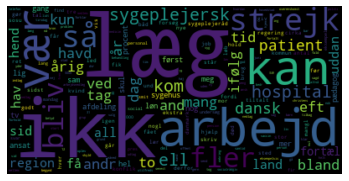

In [86]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(bag)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [76]:
dr= np.array(Image.open( "dr.jpeg"))
virus2=np.array(Image.open( "virus2.jpeg"))
nurse4=np.array(Image.open( "nurse4.jpeg"))
red_circle=np.array(Image.open( "red_circle.png"))

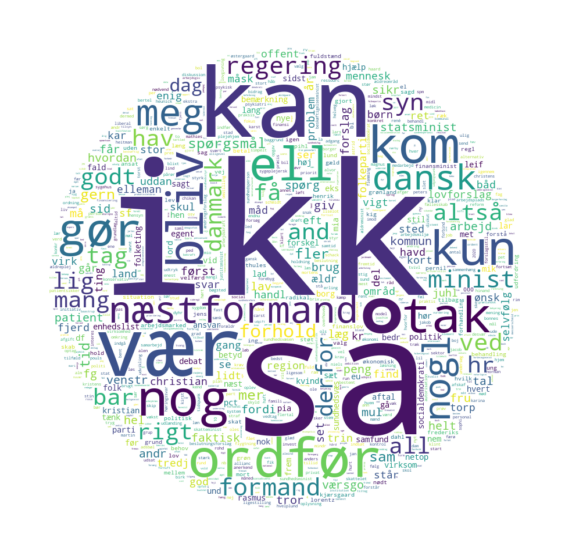

In [77]:
wc = WordCloud(background_color="white", max_words=1000, mask=red_circle)
# generate word cloud
wc.generate_from_frequencies(ft_tfidf_sum)

plt.figure(figsize = (10,10))
plt.imshow(wc, interpolation="bilinear", aspect='auto')
plt.axis("off")
plt.show()

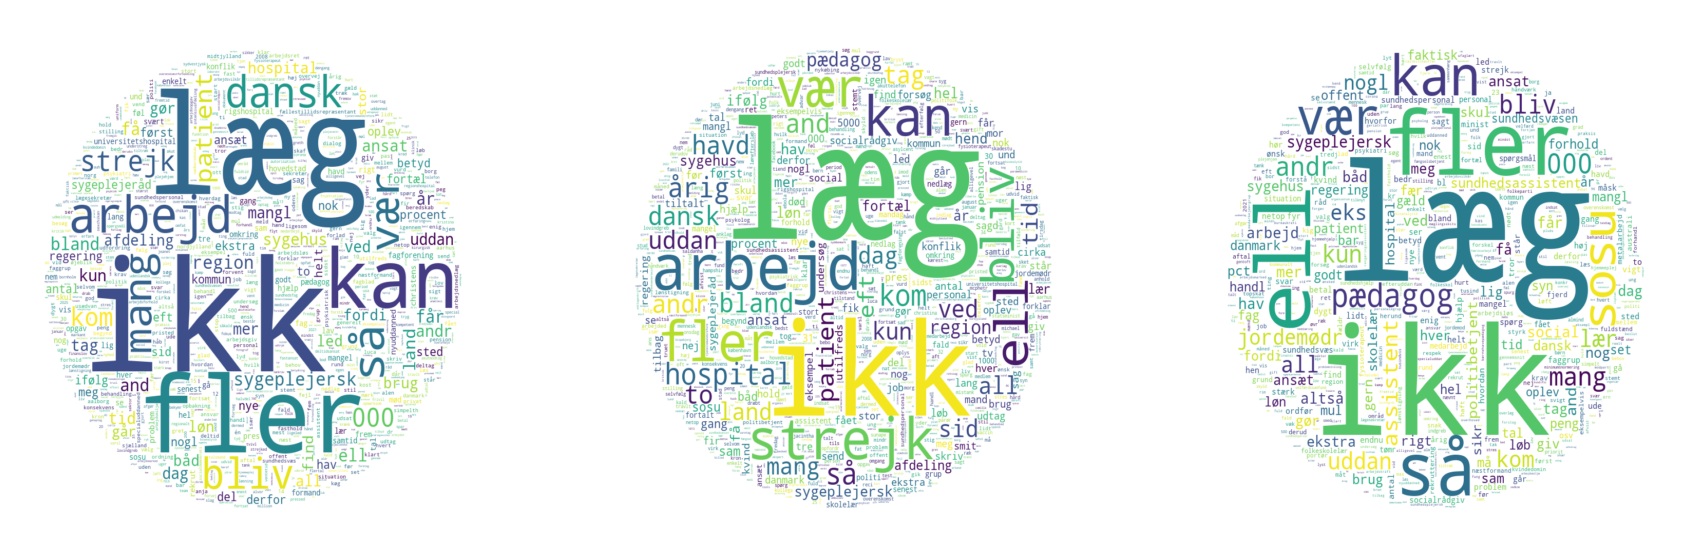

In [119]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=(30,10))

wc_dr = WordCloud(background_color="white", max_words=1000, mask=red_circle)
_=wc_dr.generate_from_frequencies(dr_bag_list)

_=plt.subplot(1, 3, 1)
ax =plt.imshow(wc_dr, interpolation="bilinear", aspect='auto')
_=plt.axis("off")

_=wc_tv2 = WordCloud(background_color="white", max_words=1000, mask=red_circle)
_=wc_tv2.generate_from_frequencies(tv2_bag_list)

_=plt.subplot(1, 3, 2)
ax =plt.imshow(wc_tv2, interpolation="bilinear", aspect='auto')
_=plt.axis("off")

wc_ft = WordCloud(background_color="white", max_words=1000, mask=red_circle)
_=wc_ft.generate_from_frequencies(ft_bag_list)

_=plt.subplot(1, 3, 3)
ax =plt.imshow(wc_ft, interpolation="bilinear", aspect='auto')
_=plt.axis("off")




In [101]:
plt.savefig("rel_1_word.jpg")

<Figure size 432x288 with 0 Axes>

In [ ]:
x1_values = [1, 2, 3]
plot 1 values
y1_values = [1, 2, 3]

plt.subplot(1, 2, 1)
draw plot 1
plt.plot(x1_values, y1_values)

x2_values = [1, 2, 3]
plot 2 values
y2_values = [3, 2, 1]

plt.subplot(1, 2, 2)
draw plot 2
plt.plot(x2_values, y2_values)

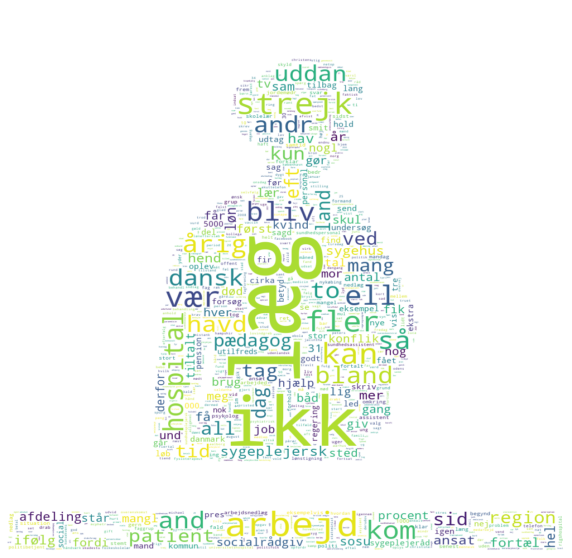

In [55]:
wc = WordCloud(background_color="white", max_words=1000, mask=nurse4)
# generate word cloud
wc.generate_from_frequencies(bag)

plt.figure(figsize = (10,10))
plt.imshow(wc, interpolation="bilinear", aspect='auto')
plt.axis("off")
plt.show()

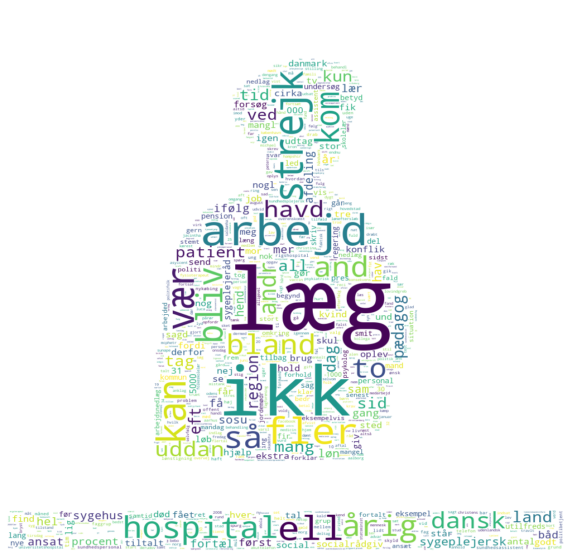

In [69]:
wc1 = WordCloud(background_color="white", max_words=1000, mask=nurse4)
# generate word cloud
wc1.generate_from_frequencies(tv2_bag_list)

plt.figure(figsize = (10,10))
plt.imshow(wc1, interpolation="bilinear", aspect='auto')
plt.axis("off")
plt.show()

In [46]:
d = {}
for a, x in bag.values:
    d[a] = x


wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

TypeError: 'builtin_function_or_method' object is not iterable

In [31]:
wordcloud = WordCloud().generate_from_frequencies(tuples.values)

AttributeError: 'list' object has no attribute 'values'

In [76]:
count = CountVectorizer() #Store the class in 'count' to ease coding
count_array = ft_2['stems'] #Take the first two reviews and store them in an array
bag = count.fit_transform(count_array) #fit_

In [77]:
array = bag.toarray() #Make the bag to an array
matrix = pd.DataFrame(data=array,columns = count.get_feature_names_out()) #Input the bag and the words into a dataframe
matrix

,00,000,0000,001,002,009,01,011,013,015,...,øvelsen,øvelser,øvelserne,øver,øverst,øvet,øvr,øvrige,øvrigt,øvsag
0,0,91,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,15,0,0,0
1,0,18,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,5,0,1,0
2,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7,0,2,0
3,2,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13,0,0,0
4,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,4,0,0,0
292,0,9,0,0,0,1,2,0,0,0,...,0,0,0,0,0,0,5,0,0,0
293,0,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,18,0,1,0
294,0,42,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,9,0,0,0


In [78]:
matrix_sum = matrix.sum().transpose()
matrix_sum.sort_values(ascending = False)

ikk                   89439
så                    82428
kan                   63835
det                   49676
vær                   41239
                      ...  
kulturmoms                1
kulturopgør               1
kulturordførere           1
kulturordførermøde        1
øvsag                     1
Length: 71425, dtype: int64

In [ ]:
count = CountVectorizer() #Store the class in 'count' to ease coding
count_array = dr_2['stems'] #Take the first two reviews and store them in an array
bag = count.fit_transform(count_array) #fit_
array = bag.toarray() #Make the bag to an array
matrix = pd.DataFrame(data=array,columns = count.get_feature_names_out()) #Input the bag and the words into a dataframe
matrix
matrix_sum = matrix.sum().transpose()
matrix_sum.sort_values(ascending = False)

In [45]:
for i in dr_2['tokenized']:
    dr_2['stemmed']=[stemmer.stem(word) for word in i]

ValueError: Length of values (503) does not match length of index (528)

In [ ]:
wordlist_stemmed_with_num = [stemmer.stem(row['tokenized']) for word in row['tokenized']]

In [5]:
# Define a tokenizer function
def tokenizer(df):
    df_tokenslist = []
    for document in tqdm.tqdm(df['content']):
        tokens = nltk.tokenize.word_tokenize(document, language = 'danish')
        df_tokenslist.append(tokens)
    df_tokens = list(itertools.chain(*df_tokenslist))
    return df_tokens

In [6]:
dr_2_tokens = tokenizer(dr_2)
print(len(dr_2_tokens))
tv2_2_tokens = tokenizer(tv2_2)
print(len(tv2_2_tokens))
ft_2_tokens = tokenizer(ft_2)
print(len(ft_2_tokens))

100%|██████████| 528/528 [00:00<00:00, 818.88it/s] 


232998


100%|██████████| 3607/3607 [00:06<00:00, 549.80it/s]


2562567


100%|██████████| 296/296 [00:16<00:00, 17.44it/s]

7843399


## Remove stopwords and create word dictionary

In [7]:
# Get stopwords list
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('danish')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oliver/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Tokenized content for three datasets

In [8]:
# Remove stopwords from token-list
dr_nostop = [word for word in dr_2_tokens if not word in stopwords]
tv2_nostop = [word for word in tv2_2_tokens if not word in stopwords]
ft_nostop = [word for word in ft_2_tokens if not word in stopwords]

### Create set of unique words

In [9]:
wordlist_complete = dr_nostop + tv2_nostop + ft_nostop

In [10]:
len(wordlist_complete)

5356096

The total number of words across our three datasets is 5356096.

Our unique wordset contains 115189 words.

## Stemming

In [11]:
stemmer = SnowballStemmer("danish")

In [12]:
[stemmer.stem(word) for word in ['tokenized']]

In [13]:
# Delete duplicates
wordlist_stemmed_with_num = list(set(wordlist_stemmed_with_num))
len(wordlist_stemmed_with_num)

75802

In [14]:
# Remove numbers
wordlist_stemmed = [word for word in wordlist_stemmed_with_num if not word.isdigit()]            

## Lemmatization

In [28]:
# Load Danish lemmatizer
lem = lemmy.load("da")

In [166]:
wordlist_lem = [lem.lemmatize("", word) for word in wordset]

In [ ]:
# Create a list instead of list of list
wordlist_lem = [word for sublist in wordlist_lem for word in sublist]

In [164]:
wordlist_lem_2 = wordlist_lem_2 

list

Comment: The lemmatization returns a list of lists that also contains more than two words which could lead to problems.
    

## Bag of words

In [32]:
dr_matrix_sum = pd.read_csv('dr_matix_sum.csv').set_index('0')

In [33]:
dr_matrix_sum.rename(

,Unnamed: 0
0,
2,00
273,000
1,001
1,007
1,015
...,...
2,øvels
4,øver
10,øverst
